# Beware of Datasaurus
---------------------------

#### by Dmytro Perepokin
##### Equinor Data Club
Oslo, Fornebu
27.06.2019

In [3]:
import pandas as pd
import seaborn as sns

Let's read in the file and look at the summary statistics. Our dataset is located inside a .zip file located at [Autodesk Research website](https://www.autodeskresearch.com/sites/default/files/The%20Datasaurus%20Dozen.zip) 

In [4]:
from zipfile import ZipFile
from urllib.request import urlopen

from io import BytesIO

z = urlopen('https://www.autodeskresearch.com/sites/default/files/The%20Datasaurus%20Dozen.zip')
myzip = ZipFile(BytesIO(z.read())).extract('The Datasaurus Dozen/DatasaurusDozen.tsv')
df = pd.read_csv(myzip, sep='\t')

### Summary statistics

In [5]:
(df
 .head())

,dataset,x,y
0,dino,55.3846,97.1795
1,dino,51.5385,96.0256
2,dino,46.1538,94.4872
3,dino,42.8205,91.4103
4,dino,40.7692,88.3333


This dataset includes 3 variables, of which 2 are numeric and 1 categorical. The categorical variable contains labels for datasets. Basically this is 13 datasets "stacked" with `x` and `y` variables on top of each other into a single file. Lets look at mean and standard deviation of `x` and `y` for each dataset individually.

In [6]:
(df
 .groupby('dataset')
 .agg(['mean', 'std']))

x                     y           
                 mean        std       mean        std
dataset                                               
away        54.266100  16.769825  47.834721  26.939743
bullseye    54.268730  16.769239  47.830823  26.935727
circle      54.267320  16.760013  47.837717  26.930036
dino        54.263273  16.765142  47.832253  26.935403
dots        54.260303  16.767735  47.839829  26.930192
h_lines     54.261442  16.765898  47.830252  26.939876
high_lines  54.268805  16.766704  47.835450  26.939998
slant_down  54.267849  16.766759  47.835896  26.936105
slant_up    54.265882  16.768853  47.831496  26.938608
star        54.267341  16.768959  47.839545  26.930275
v_lines     54.269927  16.769959  47.836988  26.937684
wide_lines  54.266916  16.770000  47.831602  26.937902
x_shape     54.260150  16.769958  47.839717  26.930002

How about correlation between `x` and `y` for each dataset?

In [7]:
(df
 .filter(['dataset', 'x'])
 .groupby('dataset')
 .corrwith(df.y))

,x
dataset,
away,-0.064128
bullseye,-0.068586
circle,-0.068343
dino,-0.064472
dots,-0.060341
h_lines,-0.061715
high_lines,-0.068504
slant_down,-0.068980
slant_up,-0.068609


Let's do some plotting to see what is this all about.

### Plotting

So let's take one of the datasets and produce scatterplot of `x` vs `y`

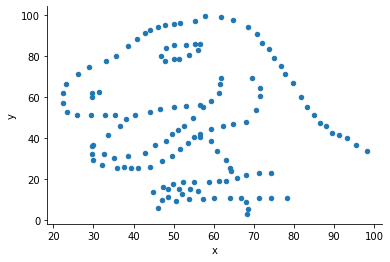

In [8]:
(df
 .query("dataset=='dino'")
 .plot
 .scatter("x", "y"))
sns.despine()

Oh, remember correlation between `x` and `y` was pretty low, so you could expect just a blob of points!

How about we take another one?

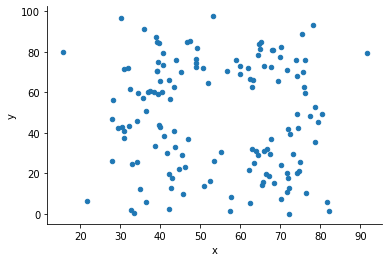

In [9]:
(df
 .query("dataset=='away'")
 .plot
 .scatter("x", "y"))
sns.despine()

Let's plot all of them at once using small multiples.

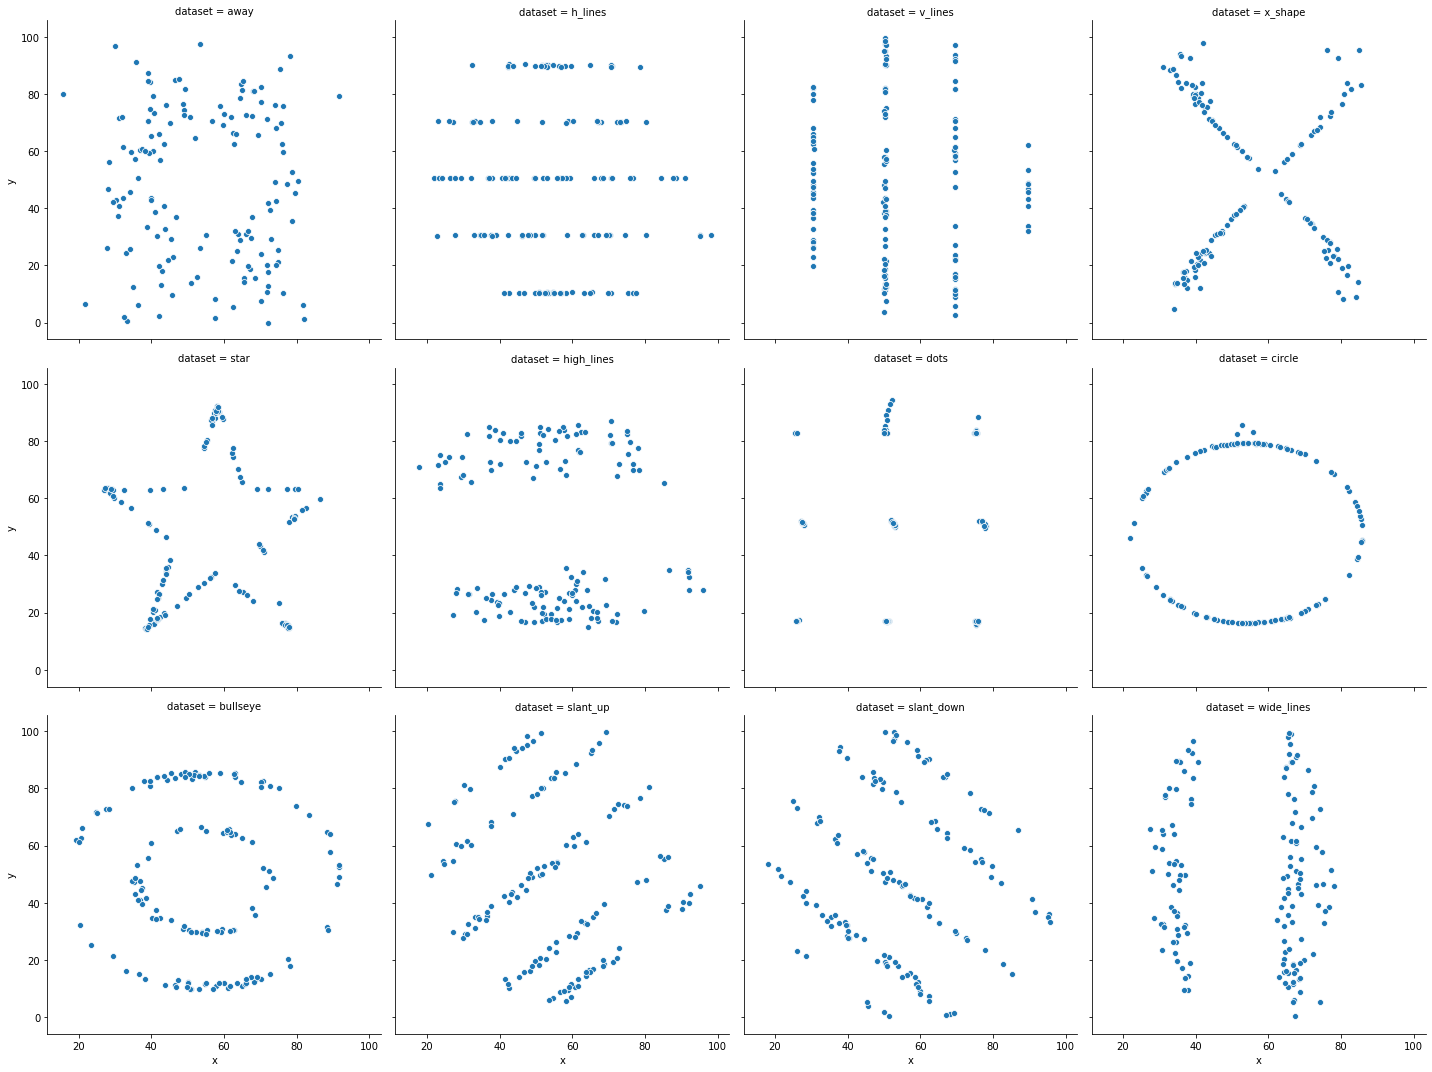

In [13]:
(df
 .query('dataset!="dino"')
 .pipe((sns.relplot, 'data'), x='x', y='y', col='dataset', col_wrap=4))
sns.despine()

And of course, king of all, Mr. Datasaurus!

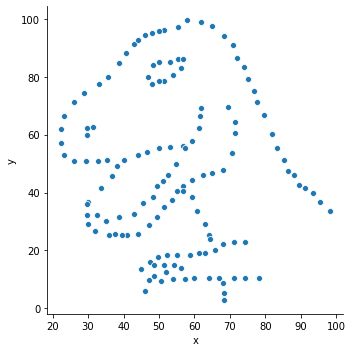

In [12]:
(df
 .query('dataset=="dino"')
 .pipe((sns.relplot,'data'), 'x', 'y'))
sns.despine()

## Further reading

First of all Autodesk Research page with story on Datasaurus is located [here](https://www.autodeskresearch.com/publications/samestats). 

Further reading on plotting with `seaborn`:
1) https://tomaugspurger.github.io/modern-6-visualization.html

In [1]:
#activate notebook with
#jupyter nbconvert Jupyter\ Slides.ipynb --to slides --post serve